In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout,Input, Embedding
from keras.callbacks import EarlyStopping
import tensorflow
%matplotlib inline

In [92]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [93]:
data_frame=pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
data_frame.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [94]:
data_frame.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of ham and spam messages')

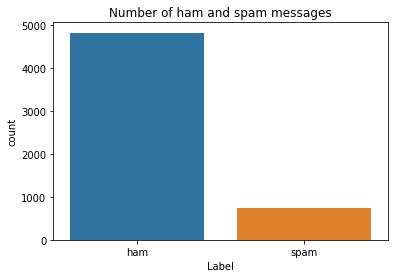

In [97]:
sns.countplot(data_frame.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [100]:
X=data_frame.v2
Y=data_frame.v1
le=LabelEncoder()
Y=le.fit_transform(Y)
Y=Y.reshape(-1,1)
    
  

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.15)

In [102]:
max_words=1000
max_len=150
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)

In [115]:
def RNN():
  inputs=Input(name='inputs',shape=[max_len])
  layer=Embedding(max_words,50,input_length=max_len)(inputs)
  layers=LSTM(64)(layer)
  layer=Dense(256,name='FC1')(layer)
  layer=Activation('relu')(layer)
  layer=Dropout(0.5)(layer)
  layer=Dense(1,name='out_layer')(layer)
  layer=Activation('sigmoid')(layer)
  model=Model(inputs=inputs,outputs=layer)
  return model

In [116]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_10 (Embedding)    (None, 150, 50)           50000     
                                                                 
 FC1 (Dense)                 (None, 150, 256)          13056     
                                                                 
 activation_20 (Activation)  (None, 150, 256)          0         
                                                                 
 dropout_10 (Dropout)        (None, 150, 256)          0         
                                                                 
 out_layer (Dense)           (None, 150, 1)            257       
                                                                 
 activation_21 (Activation)  (None, 150, 1)            0  

In [117]:
data_frame.columns

Index(['v1', 'v2'], dtype='object')

In [118]:
data=data_frame.rename(
    {
        "v1":"Catergory",
         "v2":"Message"
    },
    axis=1
)

In [119]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [120]:
data["Message Length"]=data["Message"].apply(len)

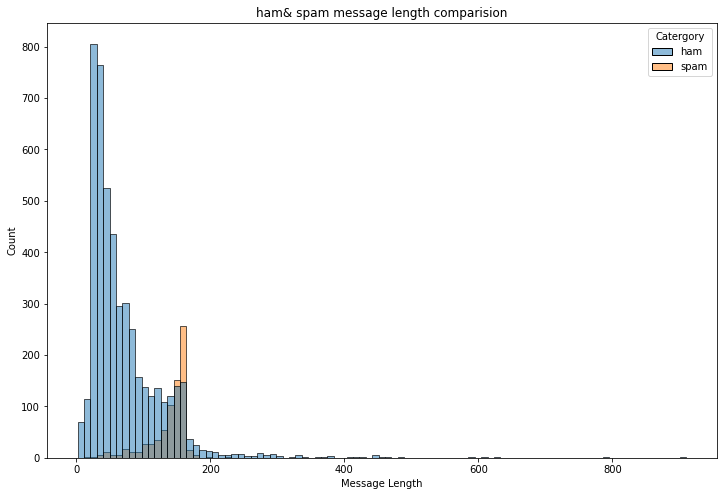

In [127]:
fig=plt.figure(figsize=(12,8))
sns.histplot(
    x=data["Message Length"],
    hue=data["Catergory"]
)
plt.title("ham& spam message length comparision")
plt.show()

In [129]:
ham_desc=data[data["Catergory"]=="ham"]["Message Length"].describe()
spam_desc=data[data["Catergory"]=="spam"]["Message Length"].describe()

print("Ham Message Length Descripition:\n",ham_desc)
print("*************************************")
print("Spam Message Length Description:\n",spam_desc)

Ham Message Length Descripition:
 count    4825.000000
mean       71.023627
std        58.016023
min         2.000000
25%        33.000000
50%        52.000000
75%        92.000000
max       910.000000
Name: Message Length, dtype: float64
*************************************
Spam Message Length Description:
 count    747.000000
mean     138.866131
std       29.183082
min       13.000000
25%      132.500000
50%      149.000000
75%      157.000000
max      224.000000
Name: Message Length, dtype: float64


In [130]:
data.describe(include="all")

,Catergory,Message,Message Length
count,5572,5572,5572.000000
unique,2,5169,NaN
top,ham,"Sorry, I'll call later",NaN
freq,4825,30,NaN
mean,NaN,NaN,80.118808
std,NaN,NaN,59.690841
min,NaN,NaN,2.000000
25%,NaN,NaN,36.000000
50%,NaN,NaN,61.000000
75%,NaN,NaN,121.000000


In [131]:
data["Catergory"].value_counts()

ham     4825
spam     747
Name: Catergory, dtype: int64

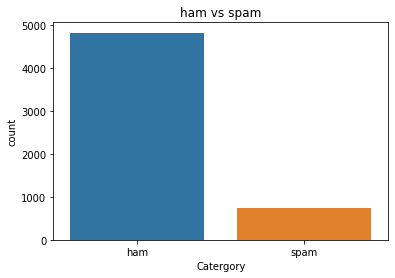

In [132]:
sns.countplot(
    data=data,
    x="Catergory"
)
plt.title("ham vs spam")
plt.show()

In [133]:
ham_count=data["Catergory"].value_counts()[0]
spam_count=data["Catergory"].value_counts()[1]

total_count=data.shape[0]

print("Ham contains:{:.2f}% of total data.".format(ham_count/total_count*100))
print("Spam contains:{:.2f}% of total data.".format(spam_count/total_count*100))

Ham contains:86.59% of total data.
Spam contains:13.41% of total data.


In [134]:
minority_len=len(data[data["Catergory"]=="spam"])
majority_len=len(data[data["Catergory"]=="ham"])
minority_indices=data[data["Catergory"]=="spam"].index
majority_indices=data[data["Catergory"]=="ham"].index
random_majority_indices=np.random.choice(
    majority_indices,
    size=minority_len,
    replace=False
)
undersampled_indices=np.concatenate([minority_indices,random_majority_indices])
df=data.loc[undersampled_indices]
df=df.sample(frac=1)

df=df.reset_index()
df=df.drop(
    columns=["index"],
)

In [135]:
df.shape

(1494, 3)

In [136]:
df["Catergory"].value_counts()

spam    747
ham     747
Name: Catergory, dtype: int64

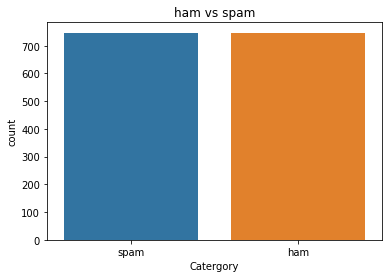

In [137]:
sns.countplot(
    data=df,
    x="Catergory"
)
plt.title("ham vs spam")
plt.show()

In [138]:
df.head()

,Catergory,Message,Message Length
0,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...,159
1,spam,URGENT! Your mobile number *************** WON...,167
2,spam,"UpgrdCentre Orange customer, you may now claim...",175
3,ham,And do you have any one that can teach me how ...,59
4,spam,Get a brand new mobile phone by being an agent...,121


In [139]:
df["Label"]=df["Catergory"].map(
    {
        "ham":0,
        "spam":1
    }
)

In [140]:
df.head()

,Catergory,Message,Message Length,Label
0,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...,159,1
1,spam,URGENT! Your mobile number *************** WON...,167,1
2,spam,"UpgrdCentre Orange customer, you may now claim...",175,1
3,ham,And do you have any one that can teach me how ...,59,0
4,spam,Get a brand new mobile phone by being an agent...,121,1


In [141]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer=PorterStemmer()




In [142]:
corpus=[]
for message in df["Message"]:
    message=re.sub("[^a-zA-Z]"," ",message)
    message=message.lower()
    message=message.split()

In [145]:
from tensorflow.keras.preprocessing.text import one_hot
vocab_size=10000

oneHot_doc=[one_hot(words,n=vocab_size)
            for words in corpus
            ]

In [146]:
df["Message Length"].describe()

count    1494.000000
mean      103.962517
std        55.200747
min         2.000000
25%        49.000000
50%       117.000000
75%       153.000000
max       450.000000
Name: Message Length, dtype: float64

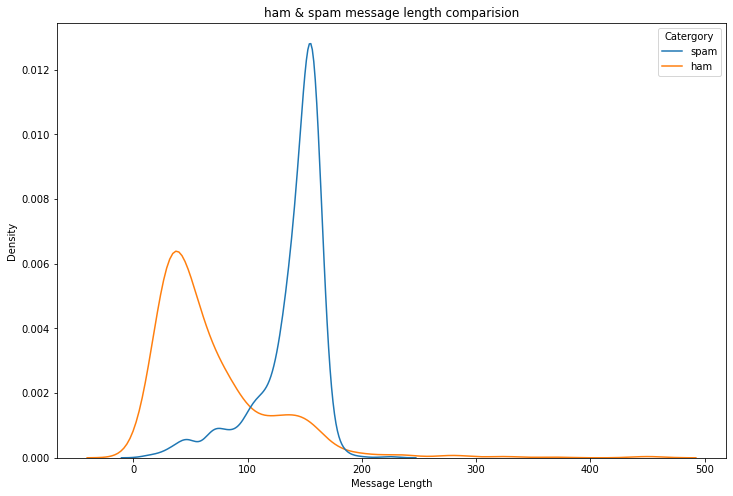

In [147]:
fig=plt.figure(figsize=(12,8))
sns.kdeplot(
    x=df["Message Length"],
    hue=df["Catergory"]
)
plt.title("ham & spam message length comparision")
plt.show()

In [148]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
sentence_len=200
embedded_doc=pad_sequences(
    oneHot_doc,
    maxlen=sentence_len,
    padding="pre"
)

In [149]:
extract_features=pd.DataFrame(
    data=embedded_doc
)
target=df["Label"]

In [150]:
df_final=pd.concat([extract_features,target],axis=1)

In [151]:
df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,Label
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [152]:
x=df_final.drop("Label",axis=1)
y=df_final["Label"]

In [153]:
from sklearn.model_selection import train_test_split

In [156]:
x_trainval,x_test,y_trainval,y_test=train_test_split(
    x,
    y,
    random_state=42,
    test_size=0.15
)

In [157]:
x_train,x_val,y_train,y_val=train_test_split(
    x_trainval,
    y_trainval,
    random_state=42,
    test_size=0.15
)

In [158]:
model=RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 150, 50)           50000     
                                                                 
 FC1 (Dense)                 (None, 150, 256)          13056     
                                                                 
 activation_22 (Activation)  (None, 150, 256)          0         
                                                                 
 dropout_11 (Dropout)        (None, 150, 256)          0         
                                                                 
 out_layer (Dense)           (None, 150, 1)            257       
                                                                 
 activation_23 (Activation)  (None, 150, 1)            0  